# Midterm k-means

## Sentinel-1 Data

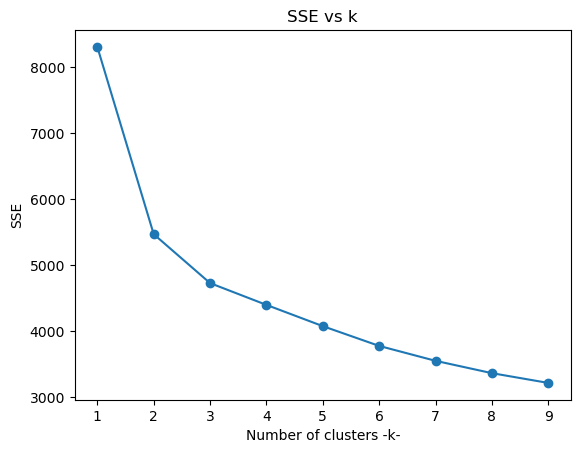

Sum of squared error is 8310.5185546875 1 number of clusters k-mean
Sum of squared error is 5469.8603515625 2 number of clusters k-mean
Sum of squared error is 4727.2197265625 3 number of clusters k-mean
Sum of squared error is 4396.69384765625 4 number of clusters k-mean
Sum of squared error is 4074.2880859375 5 number of clusters k-mean
Sum of squared error is 3774.2314453125 6 number of clusters k-mean
Sum of squared error is 3547.97509765625 7 number of clusters k-mean
Sum of squared error is 3360.87890625 8 number of clusters k-mean
Sum of squared error is 3212.67333984375 9 number of clusters k-mean


In [1]:
import rasterio
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Read the Sentinel-1 GRD data
file_path = 'crop_S1A_EW_GRDM_1SDH_20220213T115657_20220213T115757_041894_04FCE8_A2D1_Cal_Spk_TC.tif'
with rasterio.open(file_path) as src:
    sar_image = src.read(1)  # Reading the first band (HH polarization)
    width, height = src.width, src.height

# Extract a 800x800 pixel subset from the center of the image
subset_size = 800
center_x, center_y = width // 2, height // 2
start_x, start_y = center_x - subset_size // 2, center_y - subset_size // 2
subset_image = sar_image[start_y:start_y + subset_size, start_x:start_x + subset_size]

# Preprocess the data
# Convert the image to float32 for accurate computation
subset_image = subset_image.astype(np.float32)

# Normalization
#apply log transformation to reduce the dynamic range
sar_image_log = 10 * np.log10(subset_image + 1e-10)  #avoid log(0) by adding a small constant
sar_image_log[np.isinf(sar_image_log)] = 0  #replace -inf values with 0

#normalize the image
sar_image_norm = (sar_image_log - np.min(sar_image_log)) / (np.max(sar_image_log) - np.min(sar_image_log))


# Perform k-means clustering on subset image
import warnings # Ignore harmless warnings
warnings.filterwarnings("ignore")

#Experiment with different values of k.
k_val = list(range(1,10)) #k values btw 1 to 9
sse_val = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sar_image_norm)
    sse_val.append(kmeans.inertia_) #adding values to the list of Sum of squared error (SSE)

# Create a plot of the sum of the squared error vs. k for determining the ideal k value.
plt.figure(figsize=(10, 6))
plt.plot(k_val, sse_val, marker='o')
plt.xlabel('Number of clusters -k-')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

for i in range(len(k_val)): #printing sse and k values
    print('Sum of squared error is', sse_val[i], k_val[i], 'number of clusters k-mean')

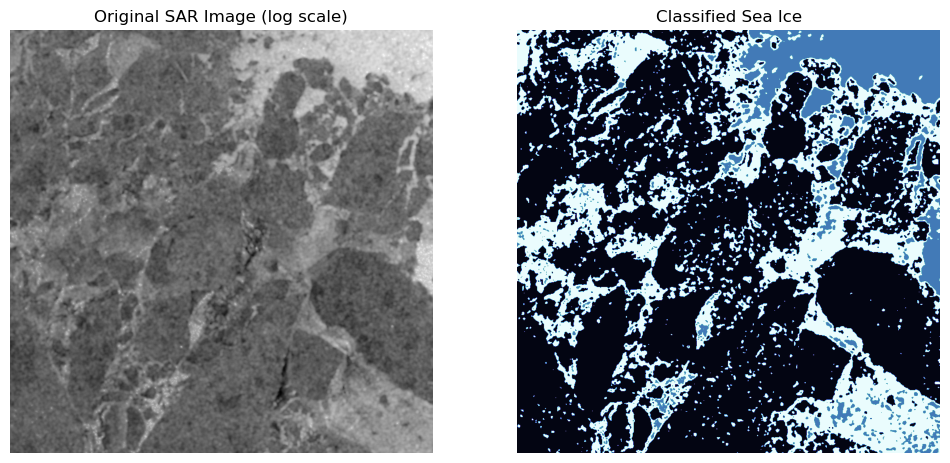

In [2]:
# Apply K-means clustering

# Reshape the image to a 2D array of pixels and corresponding values
rows, cols = sar_image_norm.shape
sar_image_2d = sar_image_norm.reshape(rows * cols, 1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(sar_image_2d) #3 selected as number of clusters due to elbow method
classified_image = kmeans.labels_.reshape(rows, cols)

# Plot the original and classified images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sar_image_norm, cmap='gray')
ax[0].set_title('Original SAR Image (log scale)')
ax[0].axis('off')

import cmocean 
ax[1].imshow(classified_image, cmap=cmocean.cm.ice)
ax[1].set_title('Classified Sea Ice')
ax[1].axis('off')

plt.savefig('S1_classified_sar_image.png', dpi=300, bbox_inches='tight')
plt.show()


## ICEYE Data

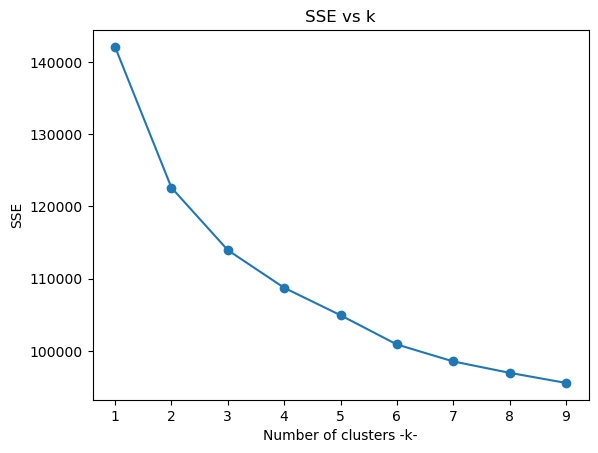

Sum of squared error is 142101.734375 1 number of clusters k-mean
Sum of squared error is 122610.46875 2 number of clusters k-mean
Sum of squared error is 113956.0078125 3 number of clusters k-mean
Sum of squared error is 108738.9140625 4 number of clusters k-mean
Sum of squared error is 104937.375 5 number of clusters k-mean
Sum of squared error is 100884.546875 6 number of clusters k-mean
Sum of squared error is 98536.59375 7 number of clusters k-mean
Sum of squared error is 96959.53125 8 number of clusters k-mean
Sum of squared error is 95560.453125 9 number of clusters k-mean


In [3]:
import rasterio
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Read the ICEYE data
file_path = 'crop_n17_ICEYE_GRD_SC_250939_20220213T160028.tif_Cal_Spk_TC.tif'
with rasterio.open(file_path) as src:
    sar_image = src.read(1)  # Reading the first band (HH polarization)
    width, height = src.width, src.height

# Extract a 5333x5333 pixel subset from the center of the image (contains the same area corresponding to sentinel-1 subset img)
subset_size = 5333
center_x, center_y = width // 2, height // 2
start_x, start_y = center_x - subset_size // 2, center_y - subset_size // 2
subset_image = sar_image[start_y:start_y + subset_size, start_x:start_x + subset_size]

# Preprocess the data
# Convert the image to float32 for accurate computation
subset_image = subset_image.astype(np.float32)

# Normalization
#apply log transformation to reduce the dynamic range
sar_image_log = 10 * np.log10(subset_image + 1e-10)  #avoid log(0) by adding a small constant
sar_image_log[np.isinf(sar_image_log)] = 0  #replace -inf values with 0

#normalize the image
sar_image_norm = (sar_image_log - np.min(sar_image_log)) / (np.max(sar_image_log) - np.min(sar_image_log))


# Perform k-means clustering on subset image
import warnings # Ignore harmless warnings
warnings.filterwarnings("ignore")

#Experiment with different values of k.
k_val = list(range(1,10)) #k values btw 1 to 9
sse_val = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sar_image_norm)
    sse_val.append(kmeans.inertia_) #adding values to the list of Sum of squared error (SSE)

# Create a plot of the sum of the squared error vs. k for determining the ideal k value.
plt.figure(figsize=(10, 6))
plt.plot(k_val, sse_val, marker='o')
plt.xlabel('Number of clusters -k-')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

for i in range(len(k_val)): #printing sse and k values
    print('Sum of squared error is', sse_val[i], k_val[i], 'number of clusters k-mean')


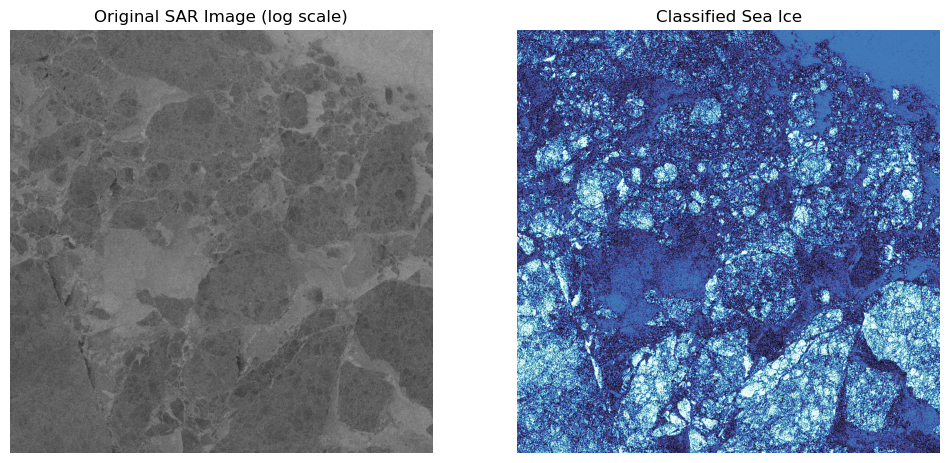

In [4]:
# Apply K-means clustering
# Reshape the image to a 2D array of pixels and corresponding values
rows, cols = sar_image_norm.shape
sar_image_2d = sar_image_norm.reshape(rows * cols, 1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(sar_image_2d)
classified_image = kmeans.labels_.reshape(rows, cols)

# Plot the original and classified images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sar_image_norm, cmap='gray')
ax[0].set_title('Original SAR Image (log scale)')
ax[0].axis('off')

import cmocean 
ax[1].imshow(classified_image, cmap=cmocean.cm.ice)
ax[1].set_title('Classified Sea Ice')
ax[1].axis('off')
plt.savefig('ICEYE_classified_sar_image.png', dpi=300, bbox_inches='tight')
plt.show()


# GMM(Gaussian Mixture Models) trial after midterm report feedback

In [1]:
import rasterio
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Read the Sentinel-1 GRD data
file_path = 'crop_S1A_EW_GRDM_1SDH_20220213T115657_20220213T115757_041894_04FCE8_A2D1_Cal_Spk_TC.tif'
with rasterio.open(file_path) as src:
    sar_image = src.read(1)  # Reading the first band (HH polarization)
    width, height = src.width, src.height

# Extract a 800x800 pixel subset from the center of the image
subset_size = 800
center_x, center_y = width // 2, height // 2
start_x, start_y = center_x - subset_size // 2, center_y - subset_size // 2
subset_image = sar_image[start_y:start_y + subset_size, start_x:start_x + subset_size]

# Preprocess the data
# Convert the image to float32 for accurate computation
subset_image = subset_image.astype(np.float32)

# Normalization
#apply log transformation to reduce the dynamic range
sar_image_log = 10 * np.log10(subset_image + 1e-10)  #avoid log(0) by adding a small constant
sar_image_log[np.isinf(sar_image_log)] = 0  #replace -inf values with 0

#normalize the image
sar_image_norm = (sar_image_log - np.min(sar_image_log)) / (np.max(sar_image_log) - np.min(sar_image_log))


# Reshape the image data for GMM
pixels = sar_image_norm.reshape(-1, 1) #flatten the image into a 2D array (number of pixels, 1 feature)


Number of culusters: 2, BIC Score: -1087581.21
Number of culusters: 3, BIC Score: -1102356.72
Number of culusters: 4, BIC Score: -1104454.32
Number of culusters: 5, BIC Score: -1106375.97
Number of culusters: 6, BIC Score: -1106823.06
Number of culusters: 7, BIC Score: -1107018.12
Number of culusters: 8, BIC Score: -1107478.46
Number of culusters: 9, BIC Score: -1108205.03


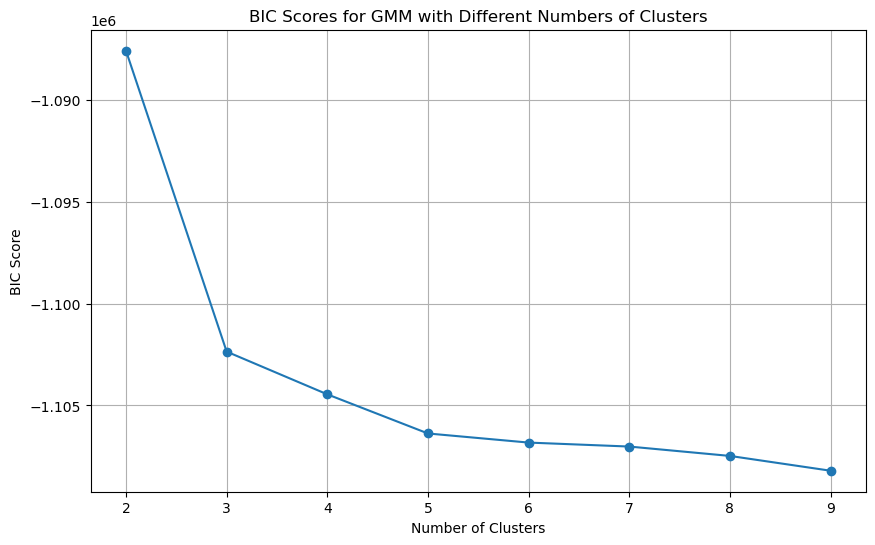

In [2]:
# fit GMMs with different numbers of components and calculate BIC
n_components_range = range(2, 10)  #testing from 2 to 10 components
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(pixels)
    bic_scores.append(gmm.bic(pixels))
    print(f'Number of culusters: {n_components}, BIC Score: {gmm.bic(pixels):.2f}')


# plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Scores for GMM with Different Numbers of Clusters')
plt.grid(True)
plt.show()

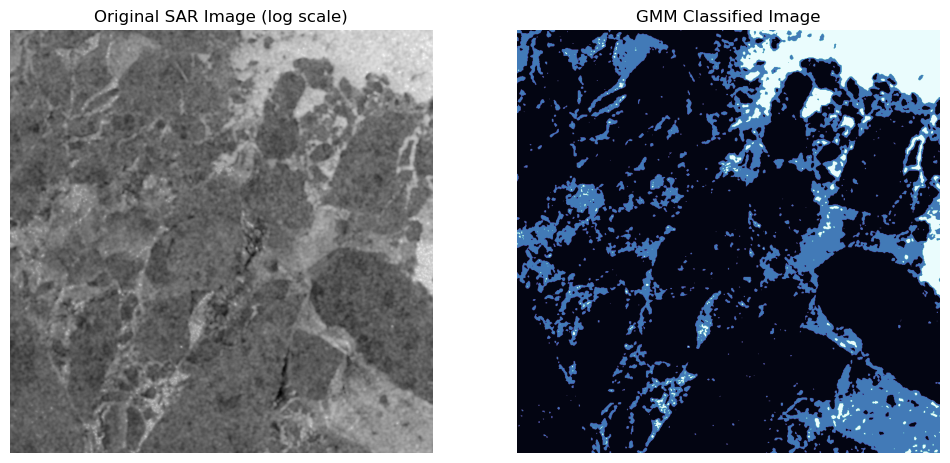

In [4]:
# Apply GMM classification
n = 3  # it seems 3 is the elbow based on the graph
gmm = GaussianMixture(n_components = n, covariance_type='full', random_state=42)
gmm.fit(pixels)

# Predict the cluster for each pixel
clusters = gmm.predict(pixels)

# Reshape the cluster labels back into the original image dimensions
clustered_image = clusters.reshape(subset_image.shape)

# Plot the original and classified images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sar_image_norm, cmap='gray')
ax[0].set_title('Original SAR Image (log scale)')
ax[0].axis('off')

import cmocean 
ax[1].imshow(clustered_image, cmap=cmocean.cm.ice)
ax[1].set_title('GMM Classified Image')
ax[1].axis('off')
plt.show()